In [1]:
# 5.1 Adding white noise channels or all-zeros channels to MNIST
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
  [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
  [train_images, np.zeros((len(train_images), 784))], axis=1)

In [3]:
# 5.2 Training the same model on MNIST data with noise channels or all-zero channels
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
  model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
  ])

  model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
  return model

model = get_model()
history_noise = model.fit(
  train_images_with_noise_channels, train_labels,
  epochs=10,
  batch_size=128,
  validation_split=0.2
)


model = get_model()
history_zeros = model.fit(
  train_images_with_zeros_channels, train_labels,
  epochs=10,
  batch_size=128,
  validation_split=0.2
)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6120 - accuracy: 0.8152 - val_loss: 0.3195 - val_accuracy: 0.9007
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2535 - accuracy: 0.9215 - val_loss: 0.1812 - val_accuracy: 0.9462
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1668 - accuracy: 0.9482 - val_loss: 0.1781 - val_accuracy: 0.9481
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1176 - accuracy: 0.9630 - val_loss: 0.1307 - val_accuracy: 0.9620
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0873 - accuracy: 0.9724 - val_loss: 0.1383 - val_accuracy: 0.9599
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0641 - accuracy: 0.9794 - val_loss: 0.1236 - val_accuracy: 0.9658
Epoch 7/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0482 - accuracy: 0.9843 - val_loss: 0.1355 - val_accuracy: 0.9642
Epoch 

[0.9006666541099548, 0.9461666941642761, 0.9480833411216736, 0.9620000123977661, 0.9599166512489319, 0.965833306312561, 0.9641666412353516, 0.9537500143051147, 0.9612500071525574, 0.965666651725769]


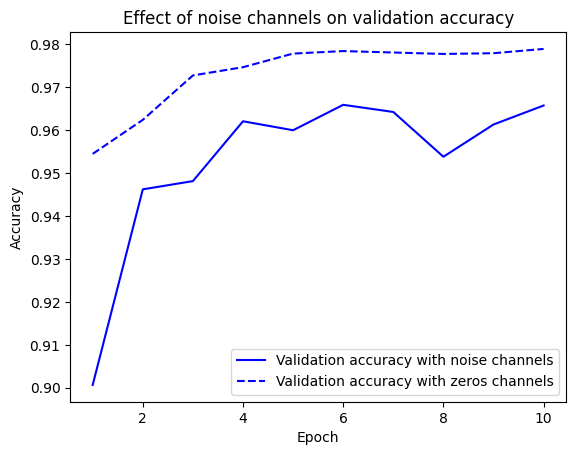

In [17]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
print(val_acc_noise)
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

In [16]:
# Fitting an MNIST models with randomly shuffled labels
(train_images, train_labels), _ = mnist.load_data() 
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = get_model()
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3159 - accuracy: 0.1067 - val_loss: 2.3095 - val_accuracy: 0.1011
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.3003 - accuracy: 0.1159 - val_loss: 2.3151 - val_accuracy: 0.1079
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2900 - accuracy: 0.1282 - val_loss: 2.3219 - val_accuracy: 0.1018
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2774 - accuracy: 0.1377 - val_loss: 2.3269 - val_accuracy: 0.1033
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2609 - accuracy: 0.1523 - val_loss: 2.3432 - val_accuracy: 0.1028
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2398 - accuracy: 0.1669 - val_loss: 2.3640 - val_accuracy: 0.0952
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2165 - accuracy: 0.1804 - val_loss: 2.3740 - val_accuracy: 0.0989